In [2]:
# Do the necessary imports
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector, array_to_latex
from qiskit.extensions import Initialize
from qiskit.result import marginal_counts
from qiskit.quantum_info import random_statevector

In [3]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers

qr = QuantumRegister(3, name="q")    # Protocol uses 3 qubits
crz = ClassicalRegister(1, name="crz") # and 2 classical bits
crx = ClassicalRegister(1, name="crx") # in 2 different registers
teleportation_circuit = QuantumCircuit(qr, crz, crx)

In [4]:
def create_bell_pair(qc, a, b):
    """Creates a bell pair in qc using qubits a & b"""
    qc.h(a) # Put qubit a into state |+>
    qc.cx(a,b) # CNOT with a as control and b as target

In [5]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
# In our case, Telamon entangles qubits q1 and q2
# Let's apply this to our circuit:
create_bell_pair(teleportation_circuit, 1, 2)
# And view the circuit so far:
teleportation_circuit.draw()

q_0: ──────────
       ┌───┐     
  q_1: ┤ H ├──■──
       └───┘┌─┴─┐
  q_2: ─────┤ X ├
            └───┘
crz: 1/══════════
                 
crx: 1/══════════

In [6]:
def alice_gates(qc, psi, a):
    qc.cx(psi, a)
    qc.h(psi)

In [7]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
create_bell_pair(teleportation_circuit, 1, 2)

## STEP 2
teleportation_circuit.barrier() # Use barrier to separate steps
alice_gates(teleportation_circuit, 0, 1)
teleportation_circuit.draw()

░      ┌───┐
  q_0: ───────────░───■──┤ H ├
       ┌───┐      ░ ┌─┴─┐└───┘
  q_1: ┤ H ├──■───░─┤ X ├─────
       └───┘┌─┴─┐ ░ └───┘     
  q_2: ─────┤ X ├─░───────────
            └───┘ ░           
crz: 1/═══════════════════════
                              
crx: 1/═══════════════════════

In [8]:
def measure_and_send(qc, a, b):
    """Measures qubits a & b and 'sends' the results to Bob"""
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

In [9]:
## SETUP
# Protocol uses 3 qubits and 2 classical bits in 2 different registers
qr = QuantumRegister(3, name="q")
crz, crx = ClassicalRegister(1, name="crz"), ClassicalRegister(1, name="crx")
teleportation_circuit = QuantumCircuit(qr, crz, crx)

## STEP 1
create_bell_pair(teleportation_circuit, 1, 2)

## STEP 2
teleportation_circuit.barrier() # Use barrier to separate steps
alice_gates(teleportation_circuit, 0, 1)

## STEP 3
measure_and_send(teleportation_circuit, 0 ,1)
teleportation_circuit.draw()

░      ┌───┐ ░ ┌─┐   
  q_0: ───────────░───■──┤ H ├─░─┤M├───
       ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
  q_1: ┤ H ├──■───░─┤ X ├──────░──╫─┤M├
       └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘
  q_2: ─────┤ X ├─░────────────░──╫──╫─
            └───┘ ░            ░  ║  ║ 
crz: 1/═══════════════════════════╩══╬═
                                  0  ║ 
crx: 1/══════════════════════════════╩═
                                     0

In [230]:
# QuNet Experiments
import random

def get_op_list(operation_num):
    gate_choice = ['X', 'Y', 'Z', 'H']
    ret_l = []
    for i in range(operation_num):
        rv = random.randrange(0, len(gate_choice))
        ret_l.append(gate_choice[rv])
    return ret_l


In [231]:
def generation(op_list, circuit):
    # Generation process
    for i in range(len(op_list)):
        if op_list[i] == 'H':
            circuit.h(0)
        elif op_list[i] == 'X':
            circuit.x(0)
        elif op_list[i] == 'Y':
            circuit.y(0)
        elif op_list[i] == 'Z':
            circuit.z(0)
    return circuit

def verification(op_list, circuit):
    # Generation process
    for i in range(len(op_list) - 1, -1, -1):
        if op_list[i] == 'H':
            circuit.h(0)
        elif op_list[i] == 'X':
            circuit.x(0)
        elif op_list[i] == 'Y':
            circuit.y(0)
        elif op_list[i] == 'Z':
            circuit.z(0)
    return circuit

In [233]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

def origin(op_list):

    # Use Aer's AerSimulator
    simulator = AerSimulator()

    # Create a Quantum Circuit acting on the q register
    circuit = QuantumCircuit(1, 1)

    circuit = generation(op_list, circuit)

    # verification process
    circuit = verification(op_list, circuit)

    # Map the quantum measurement to the classical bits
    # circuit.measure([0, 1], [0, 1])
    circuit.measure([0], [0])

    # Compile the circuit for the support instruction set (basis_gates)
    # and topology (coupling_map) of the backend
    compiled_circuit = transpile(circuit, simulator)

    # Execute the circuit on the aer simulator
    job = simulator.run(compiled_circuit, shots=1000)

    # Grab results from the job
    result = job.result()

    # Returns counts
    counts = result.get_counts(compiled_circuit)
#     print("\nTotal count old for 0 and 1 are:", counts)

    # Draw the circuit
    circuit.draw("mpl")
    return dict(counts)

In [234]:
from qiskit.quantum_info import random_statevector
from qiskit import QuantumCircuit

def new(op_list):
    simulator = AerSimulator()

    state = random_statevector(2)
    qc = QuantumCircuit(1,1)
    qc.initialize(state, 0)
#     print(state.data)

    # verification process
    qc = verification(op_list, qc)

    qc.measure([0], [0])
    compiled_circuit = transpile(qc, simulator)

    # Execute the circuit on the aer simulator
    job = simulator.run(compiled_circuit, shots=1000)

    # Grab results from the job
    result = job.result()

    # Returns counts
    counts = result.get_counts(compiled_circuit)
#     print("\nTotal count for new verification 0 and 1 are:", counts)

    # Draw the circuit
    circuit.draw("mpl")
    return dict(counts)

['H', 'Z', 'Y', 'Z', 'X', 'Y', 'X', 'Z', 'Z', 'X']
new_count = {'0': 216, '1': 784}
new_count = {'0': 409, '1': 591}
new_count = {'0': 60, '1': 940}
new_count = {'1': 139, '0': 861}
new_count = {'0': 64, '1': 936}
new_count = {'0': 130, '1': 870}
new_count = {'1': 214, '0': 786}
new_count = {'0': 609, '1': 391}
new_count = {'0': 40, '1': 960}
new_count = {'1': 334, '0': 666}
new_count = {'1': 110, '0': 890}
new_count = {'1': 876, '0': 124}
new_count = {'0': 331, '1': 669}
new_count = {'1': 352, '0': 648}
new_count = {'1': 69, '0': 931}
new_count = {'1': 799, '0': 201}
new_count = {'1': 825, '0': 175}
new_count = {'0': 636, '1': 364}
new_count = {'1': 579, '0': 421}
new_count = {'1': 359, '0': 641}
new_count = {'1': 23, '0': 977}
new_count = {'0': 664, '1': 336}
new_count = {'0': 292, '1': 708}
new_count = {'0': 519, '1': 481}
new_count = {'1': 461, '0': 539}
new_count = {'0': 810, '1': 190}
new_count = {'0': 131, '1': 869}
new_count = {'1': 701, '0': 299}
new_count = {'0': 288, '1': 71

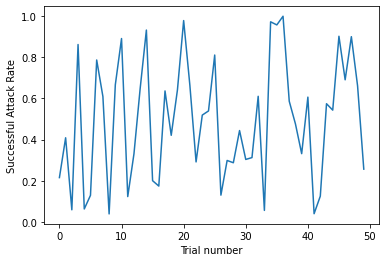

In [235]:
# Attack with only one qubit
import matplotlib.pyplot as plt

list_len = 10
op_list = get_op_list(list_len)
print(op_list)

count_ori = []
count_new = []
res_no_insider = []
for i in range(50):
    ori_count = origin(op_list)
    count_ori.append(ori_count)
    new_count = new(op_list)
    print("new_count =", new_count)
    count_new.append(new_count)
    res_no_insider.append(new_count['0'] / 1000)

plt.plot(res_no_insider)
plt.xlabel('Trial number')
plt.ylabel('Successful Attack Rate')
plt.savefig("/Users/xiangyu/Downloads/attack.pdf", format="pdf", bbox_inches="tight")

# plt.title("A simple line graph")
plt.show()


In [236]:
def new_cp(op_list):
    simulator = AerSimulator()

    state = random_statevector(2)
    qc = QuantumCircuit(1,1)
#     print(state.data)
    qc.initialize(state, 0)

    # verification process
    qc = verification(op_list, qc)

    qc.measure([0], [0])
    compiled_circuit = transpile(qc, simulator)

    # Execute the circuit on the aer simulator
    job = simulator.run(compiled_circuit, shots=1)

    # Grab results from the job
    result = job.result()

    # Returns counts
    counts = result.get_counts(compiled_circuit)
#     print("\nTotal count for new verification 0 and 1 are:", counts)

    # Draw the circuit
    circuit.draw("mpl")
    return dict(counts)

['X', 'H', 'H', 'Y', 'X', 'X', 'X', 'Y', 'Z', 'Z']


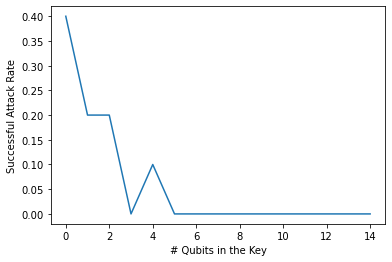

In [276]:
# Attack with only >1 qubit

import matplotlib.pyplot as plt

list_len = 10
op_list = get_op_list(list_len)
print(op_list)

num_of_qubit = 16
success_rate = []
num_of_sim = 20
sim_l = []

for i in range(1, num_of_qubit):
    success_rate = []
    for j in range(num_of_sim):
        flag = False
        for k in range(i):
            op_list = get_op_list(list_len)
            ori_count = origin(op_list)
            new_count = new_cp(op_list)
            if '1' in new_count:
                flag = True
                success_rate.append(0)
                break
        if flag == False:
            success_rate.append(1)        
    sim_l.append(sum(success_rate)/len(success_rate))
    
plt.plot(sim_l)
plt.xlabel('# Qubits in the Key')
plt.ylabel('Successful Attack Rate')
plt.savefig("/Users/xiangyu/Downloads/multi_qubits.pdf", format="pdf", bbox_inches="tight")

In [241]:
print(sim_l)

[0.3, 0.35, 0.26666666666666666, 0.2, 0.17, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142, 0.06666666666666667]


In [206]:
# Noisy model in Quantum computing

In [223]:
import numpy as np
from qiskit import execute, QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.quantum_info import Kraus, SuperOp
from qiskit.providers.aer import QasmSimulator
from qiskit.tools.visualization import plot_histogram

# Import from Qiskit Aer noise module
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise import QuantumError, ReadoutError
from qiskit.providers.aer.noise import pauli_error
from qiskit.providers.aer.noise import depolarizing_error
from qiskit.providers.aer.noise import thermal_relaxation_error

['H', 'Y', 'H', 'Y', 'Y', 'X', 'H', 'X', 'Z', 'X']


In [294]:
def error_simulate():
    list_len = 10
    op_list = get_op_list(list_len)
    
    # Simulator
    simulator = QasmSimulator()
    state = random_statevector(2)


    # System Specification
    n_qubits = 1
    circ = QuantumCircuit(n_qubits, n_qubits)
    circ.initialize(state, 0)

    # Test Circuit
    circ = verification(op_list, circ)
    circ.measure([0], [0])
    # no error situation
    circ_noerror = QuantumCircuit(n_qubits, n_qubits)


    # Test Circuit
    circ_noerror = generation(op_list, circ_noerror)
    circ_noerror = verification(op_list, circ_noerror)
#     print(circ_noerror)
    circ_noerror.measure([0], [0])
    

    # Example error probabilities
    p_reset = 0.03
    p_meas = 0.1
    p_gate1 = 0.05

    # QuantumError objects
    error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
    error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
    error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
    error_gate2 = error_gate1.tensor(error_gate1)

    # Add errors to noise model
    noise_bit_flip = NoiseModel()
    noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
    noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
    noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
    noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

#     print(noise_bit_flip)
    # Run the noisy simulation
    job = execute(circ, simulator,
                  basis_gates=noise_bit_flip.basis_gates,
                  noise_model=noise_bit_flip,shots=1)
    result_bit_flip = job.result()
    counts_bit_flip = result_bit_flip.get_counts(0)
    
    job_benchmark = execute(circ_noerror, simulator,
                  basis_gates=noise_bit_flip.basis_gates,
                  noise_model=noise_bit_flip,shots=1)
    result_bit_flip_benchmark = job_benchmark.result()
    counts_bit_flip_benchmark = result_bit_flip_benchmark.get_counts(0)

#     print("counts_bit_flip =", counts_bit_flip)
#     print("counts_bit_flip_benchmark =", counts_bit_flip_benchmark)
    return counts_bit_flip, counts_bit_flip_benchmark

In [296]:
simulate_num = 20
num_of_qubit = 16
true_but_reject = []
success_rate = []
false_but_accept = []

for i in range(1, num_of_qubit):
    success_attack_rate = []
    success_defend_rate = []
    for j in range(simulate_num):
        flag_attack = True
        flag_verify = True
        for k in range(i):
            counts_bit_flip, counts_bit_flip_benchmark = error_simulate()
            if '1' in counts_bit_flip:
                flag_attack = False
                success_attack_rate.append(0)
            if '1' in counts_bit_flip_benchmark:
                flag_verify = False
                success_defend_rate.append(1)
            if flag_attack == False and flag_verify == False:
                break
        if flag_attack == True:
            success_attack_rate.append(1) 
        if flag_verify == True:
            success_defend_rate.append(0)
    false_but_accept.append(sum(success_attack_rate)/len(success_attack_rate))
    true_but_reject.append(sum(success_defend_rate)/len(success_defend_rate))
print("false_but_accept =", false_but_accept)
print("true_but_reject =", true_but_reject)

false_but_accept = [0.35, 0.18181818181818182, 0.0, 0.07894736842105263, 0.025, 0.022222222222222223, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
true_but_reject = [0.0, 0.2, 0.42857142857142855, 0.25, 0.6, 0.6, 0.35, 0.45, 0.5714285714285714, 0.8571428571428571, 0.9, 0.75, 0.75, 0.65, 0.8095238095238095]


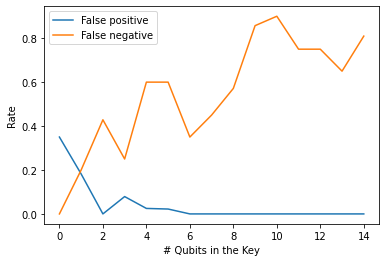

In [297]:
plt.plot(false_but_accept,label="False positive")
plt.plot(true_but_reject,label="False negative")

plt.xlabel('# Qubits in the Key')
plt.ylabel('Rate')
plt.savefig("/Users/xiangyu/Downloads/noise.pdf", format="pdf", bbox_inches="tight")
plt.legend(loc="upper left")
# plt.title("A simple line graph")
plt.show()


In [287]:
print(false_but_accept)

[0.0, 0.3333333333333333, 0.0, 0.5]


In [288]:
print(true_but_reject)

[0.0, 0.5, 0.5, 0.0]
